# CAPSTONE PROJECT - HEART DISEASE PREDICTION

### Problem 
   #### Create an efficient ML model to predict the patient has Heart disease or not with the given labelled data set.

## Features



##### age:   age in year

##### sex: Male=1 ,Female=0

##### cp: Chest pain experienced (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

##### trestbps: resting blood pressure in (mmHg), Ideal blood pressure is considered to be between 90/60 mmHg and 120/80 mmHg, High 140/90 mmHg or higher, Low 90/60 mmHg or Lower

##### chol: Serum cholestoral in mg/dL the normal range in (All aged 19 and younger at most 170 mg/dL) and (in aged 20 and older 125-200 mg/dL)

##### fbs: the person's fasting blood suger (>120 mg/dL) (1=True, 0=False)

##### restecg: Resting electrocardiographic measurmeant (0 = normal, 1 = having ST-T wave abnormal, 2 = showing probable or definite left ventricular hypertrophy)

##### thalach: The person's maximum heart rate achieved

##### exang: Exercise induced angina (1 = yes; 0 = no)

##### oldpeak: ST depression induced by exercise relative to rest

##### slope: the slope of the peak exercise ST segment ( 1: upsloping, 2: flat, 3: downsloping)

##### ca: number of major vessels (0-3) colored by flourosopy

##### thal: Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or ,
##### inadequate amount of hemoglobin. (3 = normal; 6 = fixed defect; 7 = reversable defect)

##### target: Heart disease (1= True, 0= False)

In [1]:

# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import joblib
from tkinter import *
import warnings
warnings.filterwarnings("ignore")


In [2]:
# loading the data as df
df = pd.read_csv(r"C:\Users\jishn\Downloads\heart disease prediction.csv")
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0
302,57.0,0,1,130,236,0,0,174,0,0.0,1.0,1,2,0


### Data cleaning

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     302 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       1
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dropna(axis = 0, inplace = True)# drpping null values sice its only a few percentage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    float64
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trestbps  300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalach   300 non-null    int64  
 8   exang     300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slope     300 non-null    float64
 11  ca        300 non-null    int64  
 12  thal      300 non-null    int64  
 13  target    300 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.376667,0.686667,0.963333,131.52000,246.040000,0.150000,0.526667,149.733333,0.326667,1.041333,1.406667,0.726667,2.313333,0.543333
std,9.081282,0.464624,1.029005,17.58276,51.930218,0.357668,0.526192,22.915481,0.469778,1.160278,0.613087,1.017549,0.613523,0.498951
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.00000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.00000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,274.250000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


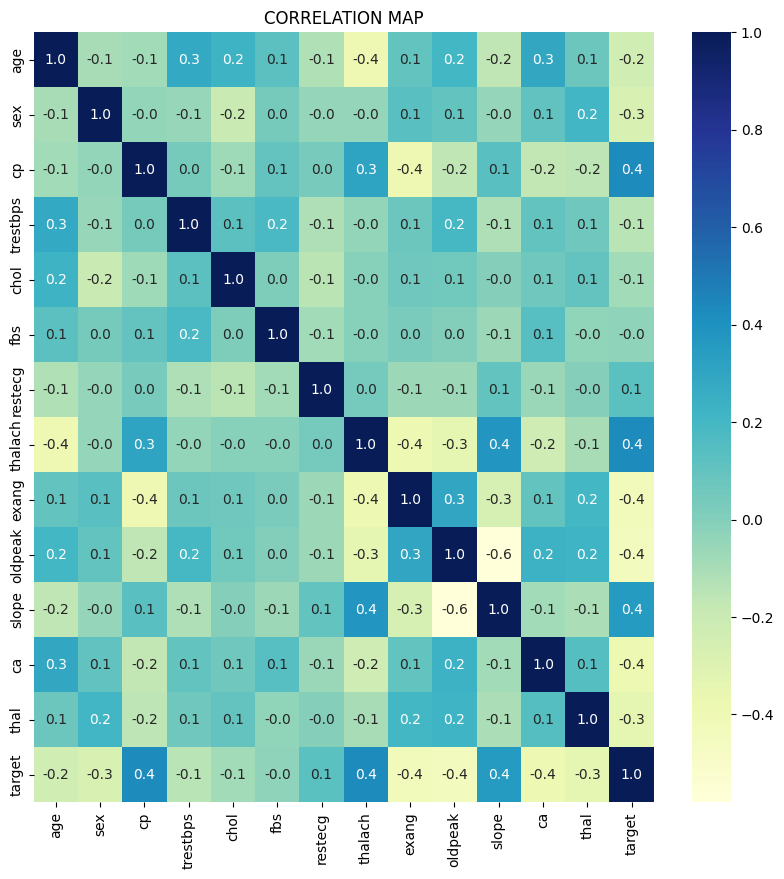

In [9]:
# checking for correlation among features
plt.figure(figsize=(10,10))
corr= df.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True, fmt='.1f')
plt.title('CORRELATION MAP')
plt.show()

## EDA

## Sex vs Target

Text(0.5, 1.0, 'GENDERWISE COUNT')

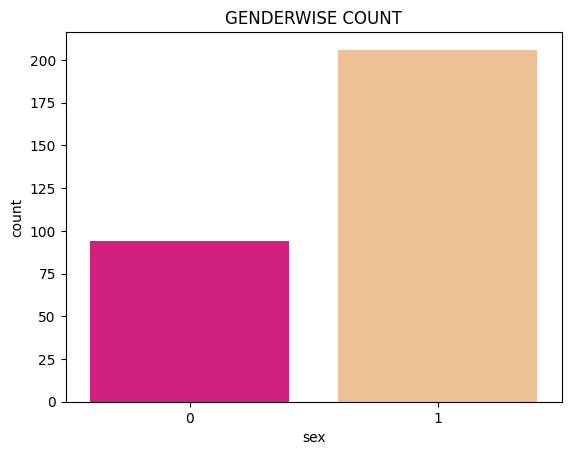

In [10]:
sns.countplot(x = 'sex', data= df, palette= 'Accent_r')
plt.title('GENDERWISE COUNT')

In [11]:
df.target.value_counts() # for getting the count of affected and non affected persons

target
1    163
0    137
Name: count, dtype: int64

In [12]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,70
1,113,93


Text(0.5, 1.0, 'GENDER COUNT IN TARGET')

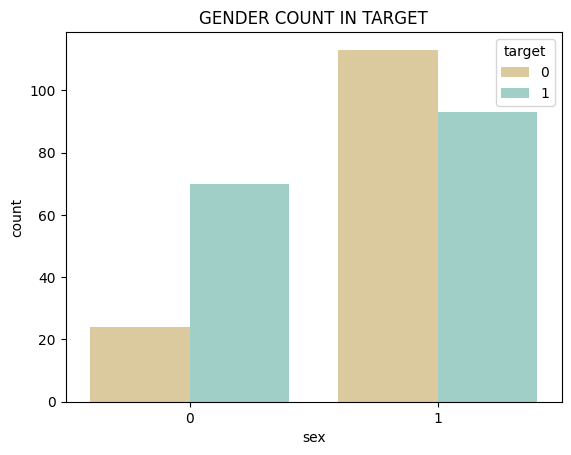

In [13]:
sns.countplot(x="sex", hue="target", data=df, palette= 'BrBG') # for getting  the count of affected and non affected based on sex
plt.title("GENDER COUNT IN TARGET")

Text(0.5, 1.0, 'MALE')

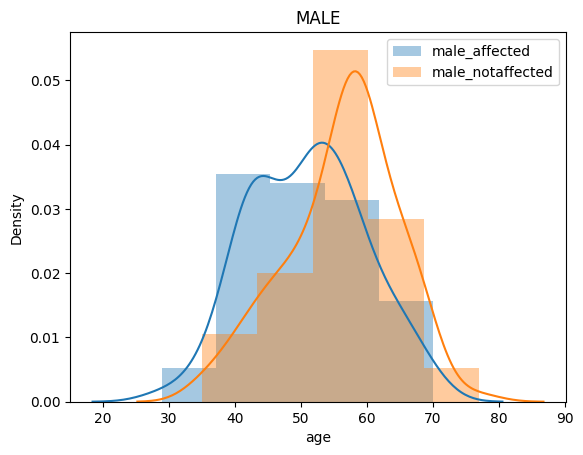

In [14]:
# analysis only on male 
male = df[df.sex == 1]
male_affected = male[(male.target==1)]
male_notaffected = male[male.target == 0]
sns.distplot(male_affected.age,label = 'male_affected', bins = 5, )
sns.distplot(male_notaffected.age,label = 'male_notaffected', bins = 5, )
plt.legend()
plt.title('MALE')

Text(0.5, 1.0, 'FEMALE')

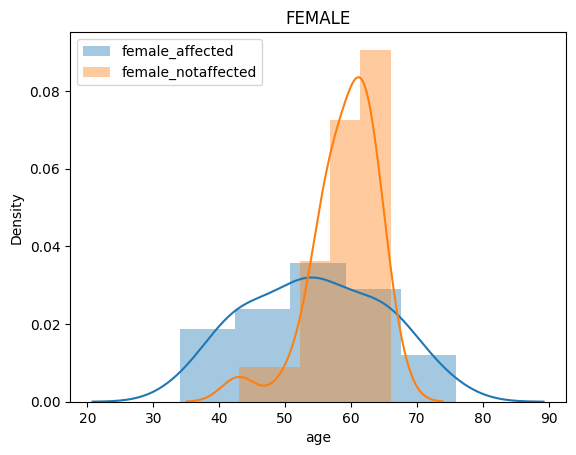

In [15]:
# analysys on females
female = df[df.sex == 0]
female_affected = female[(female.target==1)]
female_notaffected = female[female.target == 0]
sns.distplot(female_affected.age,label = 'female_affected', bins = 5, kde = True )
sns.distplot(female_notaffected.age,label = 'female_notaffected', bins = 5,kde = True )
plt.legend()
plt.title('FEMALE')

Text(0.5, 0, 'Male and Target')

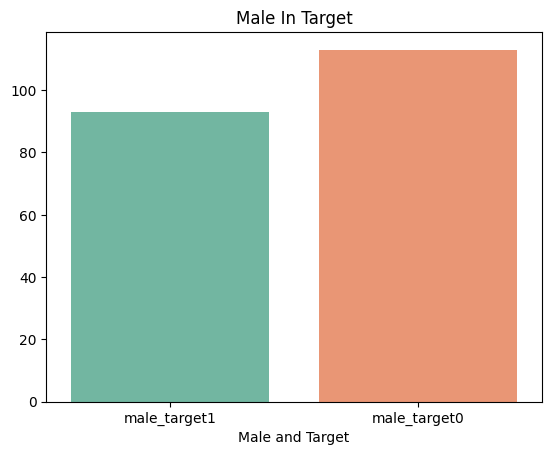

In [16]:
male_target1 = len(df[(df.sex ==1) & (df.target==1)])
male_target0 = len(df[(df.sex == 1) & (df.target == 0)])
sns.barplot(x= ['male_target1','male_target0' ], y = [male_target1, male_target0], palette = 'Set2')
plt.title('Male In Target')
plt.xlabel('Male and Target')



# sns.distplot(woman_affected.age,label = 'woman_affected', bins = 5, kde = True)

#### in males how many are diseased and not diseased

Text(0.5, 0, 'Female and Target')

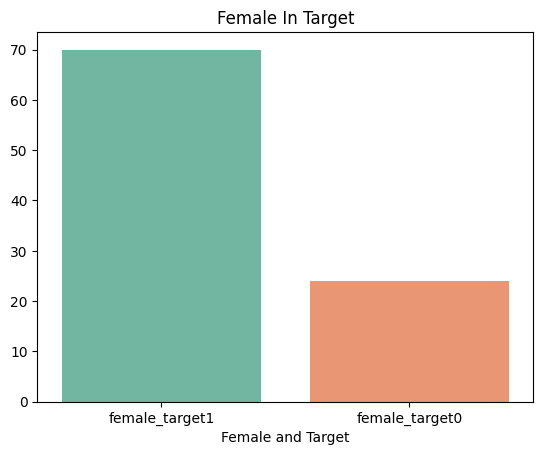

In [17]:
female_target1 = len(df[(df.sex ==0) & (df.target==1)])
female_target0 = len(df[(df.sex == 0) & (df.target == 0)])
sns.barplot(x= ['female_target1','female_target0' ], y = [female_target1, female_target0], palette = 'Set2')
plt.title('Female In Target')
plt.xlabel('Female and Target')

#### in females how many are diseased and not diseased

### Blood pressure vs Target

Text(0.5, 1.0, 'BP vs Target')

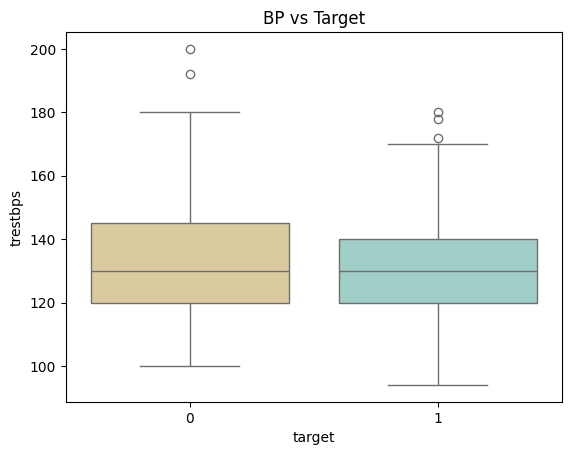

In [18]:
sns.boxplot(x= 'target', y = 'trestbps', data = df, palette = 'BrBG')
plt.title('BP vs Target')

### Chest pain vs Target

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,103,39
1,9,40
2,18,69
3,7,15


0: typical angina
1: atypical angina
2: non-anginal pain
3: asymptomatic



Text(0.5, 0, 'Chest and Target')

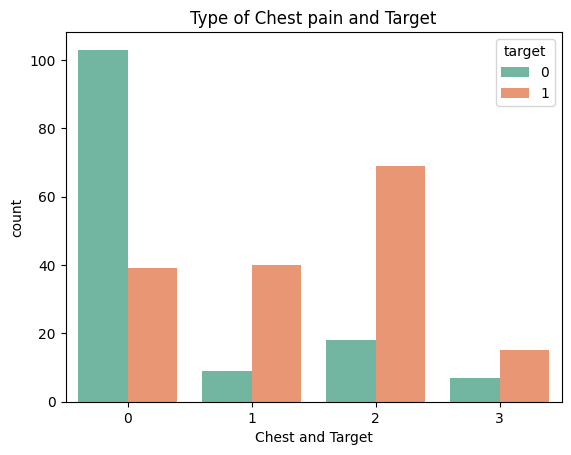

In [20]:
sns.countplot(x='cp', hue='target', data =df, palette= 'Set2')
plt.title('Type of Chest pain and Target')
plt.xlabel('Chest and Target')

#### When the chest pain is non-anginal and atypical angina chances of being  a Heart patient is more

### Cholestrol vs Target

Text(0.5, 1.0, 'CHOLESTEROL VS TARGET')

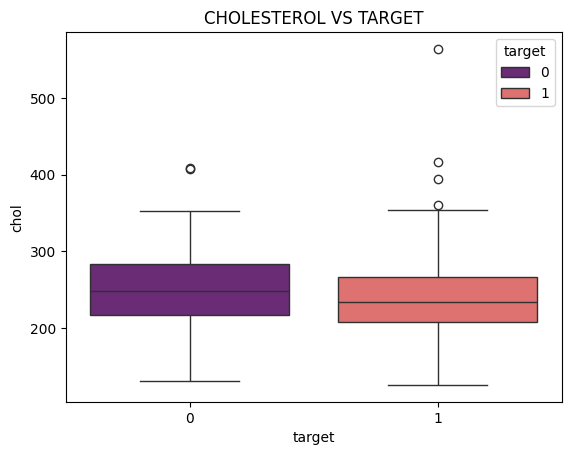

In [21]:
sns.boxplot(x= 'target', y= 'chol', data= df,hue='target', palette = 'magma')
plt.title('CHOLESTEROL VS TARGET')

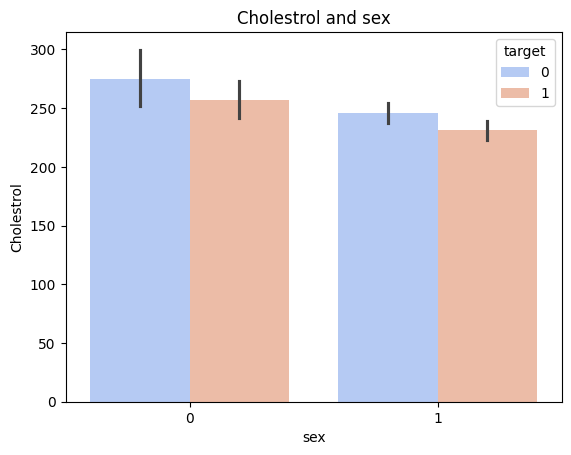

In [22]:
sns.barplot(y='chol',data=df,x='sex',hue='target',palette='coolwarm')
plt.title('Cholestrol and sex')
plt.xlabel('sex')
plt.ylabel('Cholestrol');

### Blood sugar vs Target

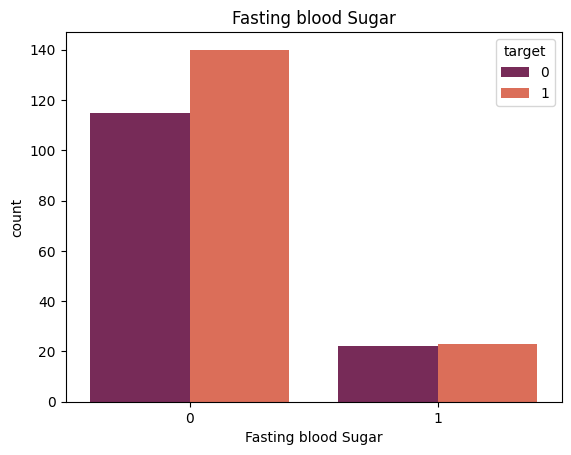

In [23]:
sns.countplot(x = 'fbs',hue='target', data = df, palette = 'rocket')
plt.title('Fasting blood Sugar')
plt.xlabel('Fasting blood Sugar')
plt.show()

 #### Fasting blood Suger < 120( 0 class) have more chance of having Heart Disease than people havnig Fasting blood Suger >120(1 class)

### ECG vs Target

In [24]:
df.restecg.value_counts()

restecg
1    150
0    146
2      4
Name: count, dtype: int64

0: Normal= 147
1: ST-T wave abnormal= 152
2: left ventricular hypertrophy= 4

Text(0.5, 1.0, 'ECG vs Target')

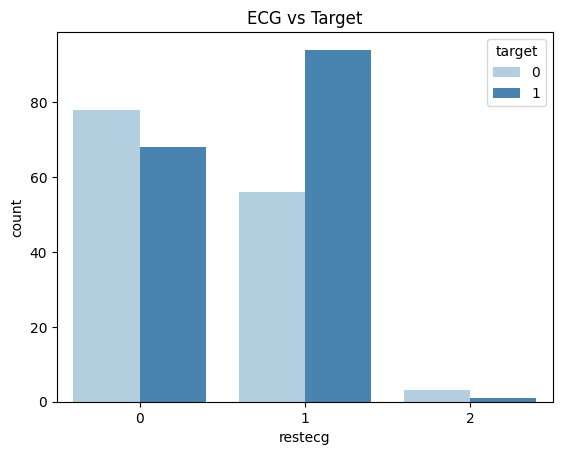

In [25]:
sns.countplot(x="restecg", hue="target", data=df, palette = 'Blues')
plt.title('ECG vs Target')

### Thalach vs Target

Text(0.5, 1.0, 'Maximum Heart Rate vs Target')

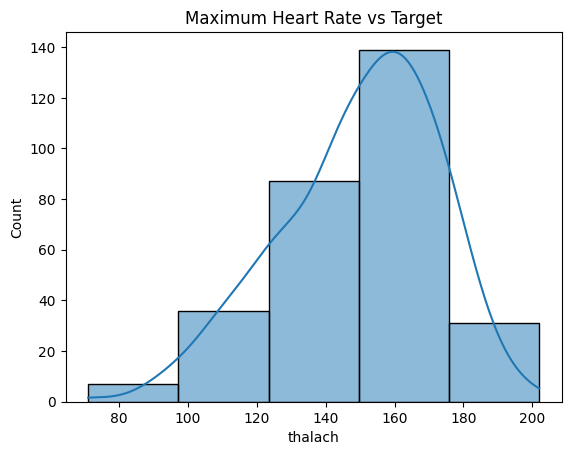

In [26]:
sns.histplot(df.thalach,bins = 5, kde = True)
plt.title('Maximum Heart Rate vs Target')

0: typical angina
1: atypical angina
2: non-anginal pain
3: asymptomatic

Text(0.5, 1.0, 'Chest Pain vs Maximum Heart Rate')

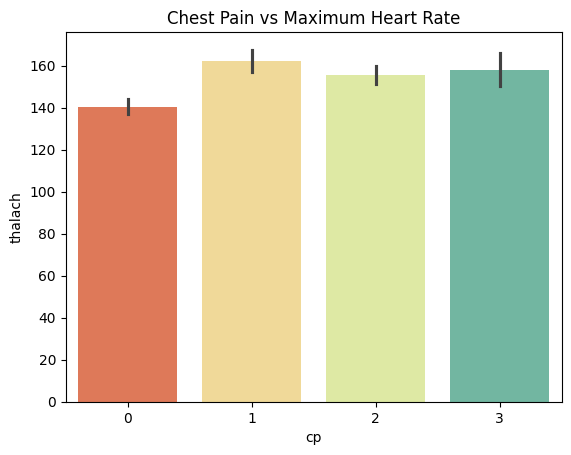

In [27]:
sns.barplot(x='cp', y ='thalach', data = df, palette='Spectral' )
plt.title('Chest Pain vs Maximum Heart Rate')

#### For atypical anginical pain the max heart rate is higher

### Exang vs Target

Text(0.5, 1.0, 'Excersize Induced Angina vs Target')

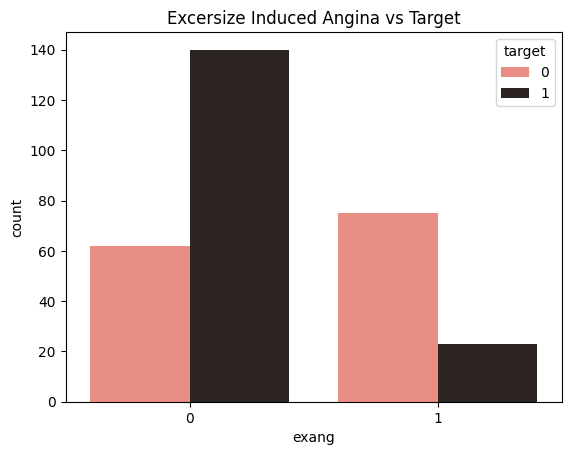

In [28]:
sns.countplot(x = 'exang',hue='target', data = df, palette = 'dark:salmon_r');

plt.title('Excersize Induced Angina vs Target')

In [29]:
df.slope.value_counts()

slope
2.0    142
1.0    138
0.0     20
Name: count, dtype: int64

1: upsloping, 2: flat, 3: downsloping

Text(0.5, 1.0, 'Slope vs Target')

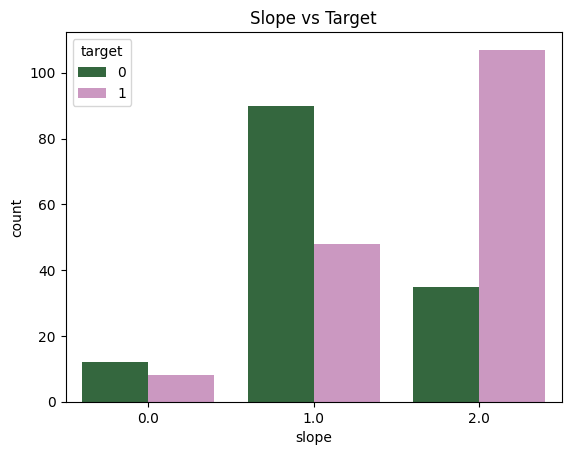

In [30]:
sns.countplot(x= 'slope', hue = 'target', data = df, palette = 'cubehelix' )
plt.title('Slope vs Target')

### Thalassemia vs Target

In [31]:
df['thal'].value_counts()

thal
2    164
3    116
1     18
0      2
Name: count, dtype: int64

#### 0 means no Thalassemia in blood= 2,
#### 1 means Thalassemia is normal in blood= 18,
#### 2 means Thalassemia is fixed defect= 164,
#### 3 means Thalassemia is reversable defect= 116

Text(0.5, 1.0, 'Thalassemia vs Target')

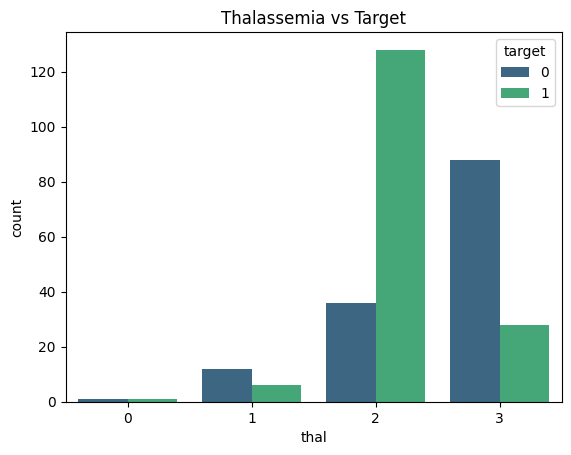

In [32]:
sns.countplot(x= 'thal', hue = 'target', data = df, palette = 'viridis')
plt.title('Thalassemia vs Target')

#### Patients with  Fixed thalassemia defect  are more prone Heart Disease

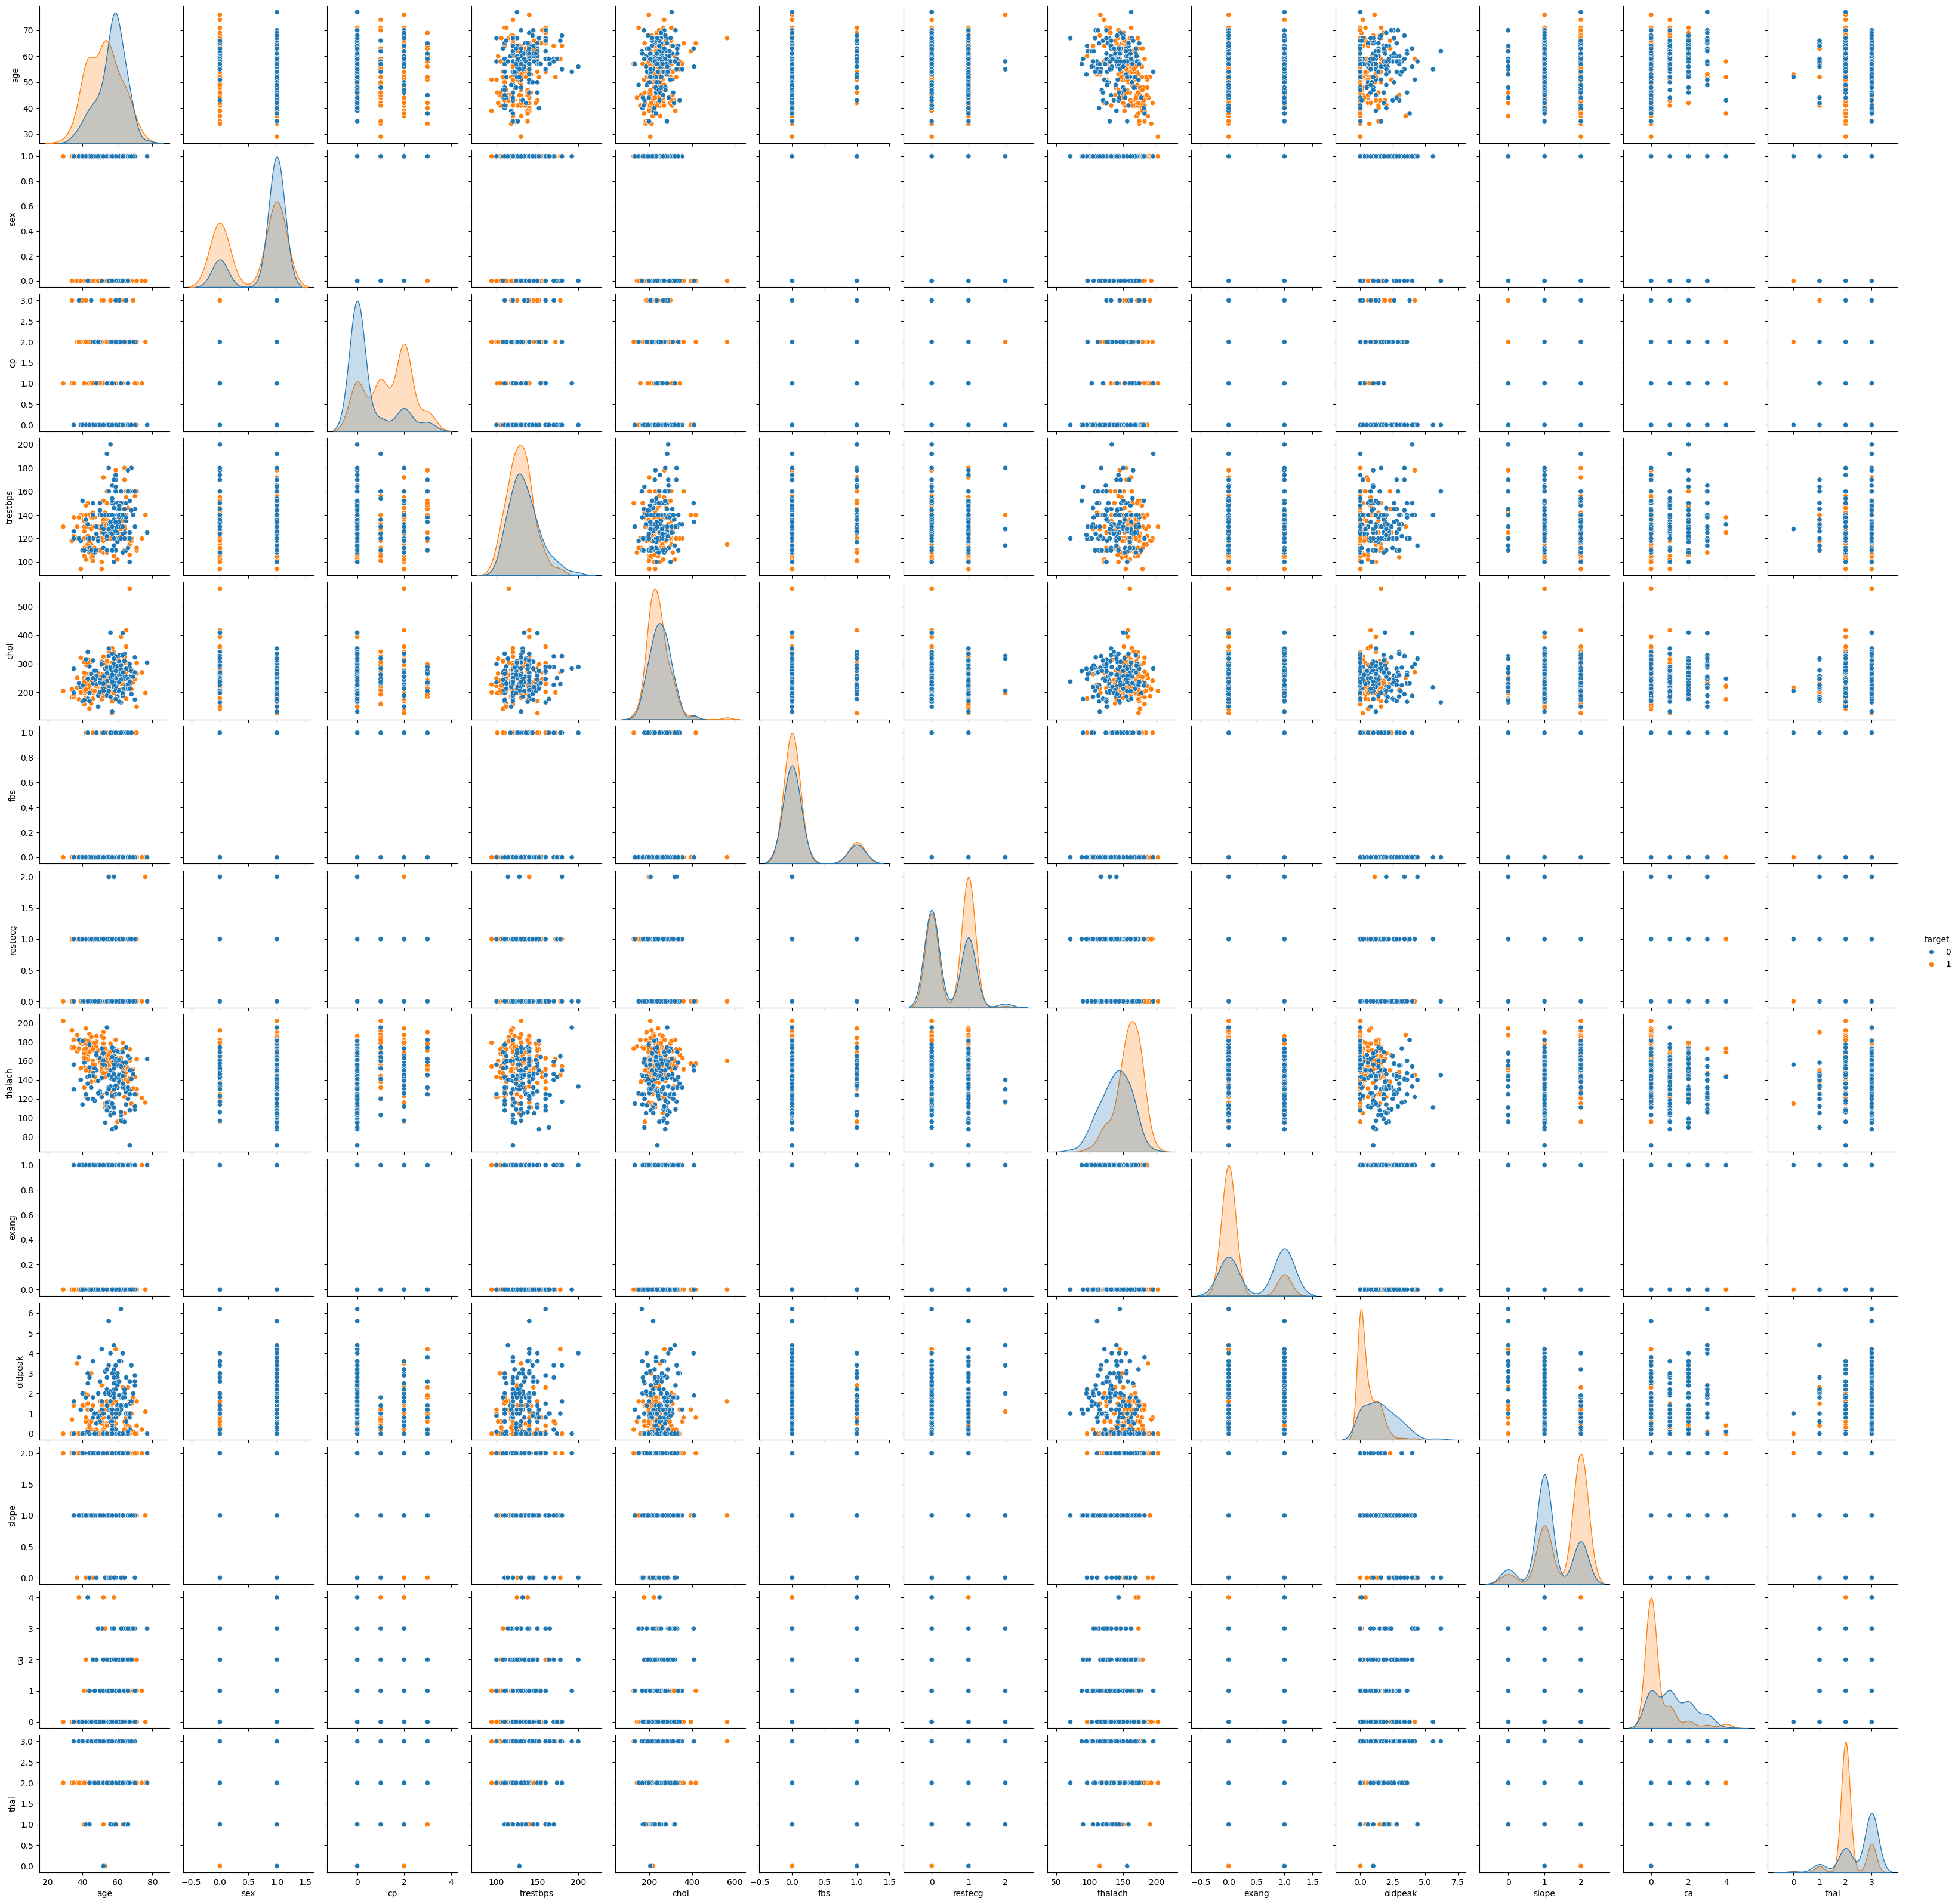

In [33]:
sns.pairplot(df,diag_kind ='kde', hue ='target')


# Model Building

Text(0.5, 1.0, 'UNSCALED DATA')

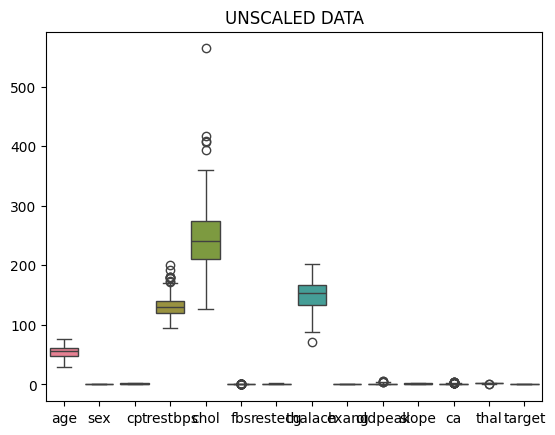

In [34]:
sns.boxplot(df)
plt.title('UNSCALED DATA')


### Removing Outliers

In [35]:
# Calculate IQR
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the closest bound
df['trestbps'] = df['trestbps'].clip(lower=lower_bound, upper=upper_bound)

# Calculate IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the closest bound
df['chol'] = df['chol'].clip(lower=lower_bound, upper=upper_bound)


## Old peak
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the closest bound
df['oldpeak'] = df['oldpeak'].clip(lower=lower_bound, upper=upper_bound)



In [36]:
# def replace_outliers_with_iqr(column):
#     # Inside this function, 'column' represents a single column of the dataframe
    
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Replace outliers in the current column with the closest bound
#     return column.clip(lower=lower_bound, upper=upper_bound)

# # Apply the function to each column in the dataframe
# df_imputed = df.apply(replace_outliers_with_iqr, axis=0)

Text(0.5, 1.0, 'NO OUTLIER')

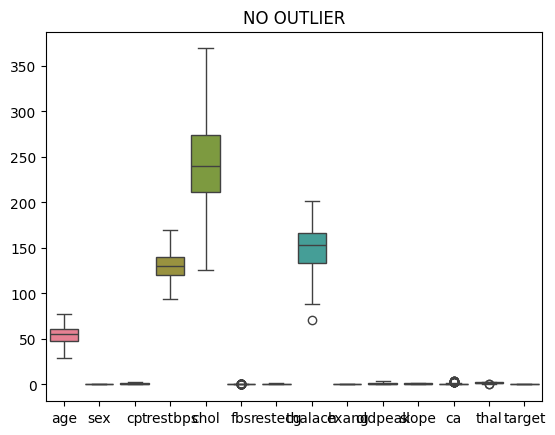

In [37]:
sns.boxplot(df)
plt.title('NO OUTLIER')


In [38]:
# df_nOutlier = df[(X.zscore>-3) &(X.zscore<3)]

In [39]:
# normalising the data
X = df.drop('target', axis = 1)
X_zscore = X.apply(zscore)
y = df.target
X_zscore.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,2.013204e-16,7.105427e-17,-2.368476e-17,-7.934394e-16,2.486900e-16,-2.368476e-17,1.657933e-16,5.447494e-16,-4.736952e-17,-7.105427e-17,-1.421085e-16,4.736952e-17,-1.894781e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-2.799061e+00,-1.480368e+00,-9.377435e-01,-2.240754e+00,-2.502695e+00,-4.200840e-01,-1.002574e+00,-3.441555e+00,-6.965260e-01,-9.268765e-01,-2.298235e+00,-7.153272e-01,-3.776874e+00
25%,-7.309253e-01,-1.480368e+00,-9.377435e-01,-6.735121e-01,-7.133829e-01,-4.200840e-01,-1.002574e+00,-6.986560e-01,-6.965260e-01,-9.268765e-01,-6.644186e-01,-7.153272e-01,-5.115651e-01
50%,1.239043e-01,6.755077e-01,3.569266e-02,-7.072681e-02,-1.029118e-01,-4.200840e-01,9.010472e-01,1.427910e-01,-6.965260e-01,-2.041658e-01,-6.644186e-01,-7.153272e-01,-5.115651e-01
75%,7.305576e-01,6.755077e-01,1.009129e+00,5.320585e-01,6.180757e-01,-4.200840e-01,9.010472e-01,7.219688e-01,1.435697e+00,5.185450e-01,9.693977e-01,2.690680e-01,1.121089e+00
max,2.495367e+00,6.755077e-01,1.982565e+00,2.340414e+00,2.615264e+00,2.380476e+00,2.804668e+00,2.284656e+00,1.435697e+00,2.686677e+00,9.693977e-01,3.222254e+00,1.121089e+00


Text(0.5, 1.0, 'SCALED DATA')

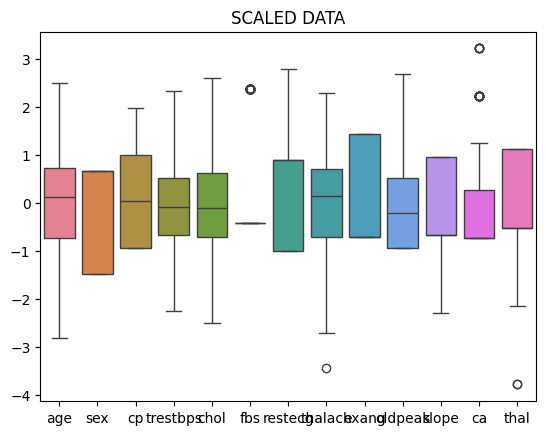

In [40]:
sns.boxplot(X_zscore)
plt.title('SCALED DATA')

In [41]:
# df_nOutlier = X_zscore[(X_zscore>-2) &(X_zscore<2)]
# sns.boxplot(df_nOutlier)
# plt.title('NO OUTLIER')

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.3, random_state=42)

In [43]:
Accuracies = {}


# Logistic Reggression

#### hyper parameter tuning

In [44]:
lg = LogisticRegression()

In [45]:
parameters_log = [{'penalty':['l2'],'C':[0.1,0.4,0.5],'random_state':[0]}]


In [46]:
search = GridSearchCV(lg, parameters_log, error_score='raise')

In [47]:
result = search.fit(x_train, y_train)

In [48]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8333333333333334
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 0}


In [49]:
lr = LogisticRegression(C= 0.1, penalty = 'l2', random_state= 0)
lr.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=0)

In [50]:
y_pred_log = lr.predict(x_test)

Accuracy :83.33%
Logistic TRAIN score with  0.8476190476190476
Logistic TEST score with  0.8333333333333334

[[31  8]
 [ 7 44]]


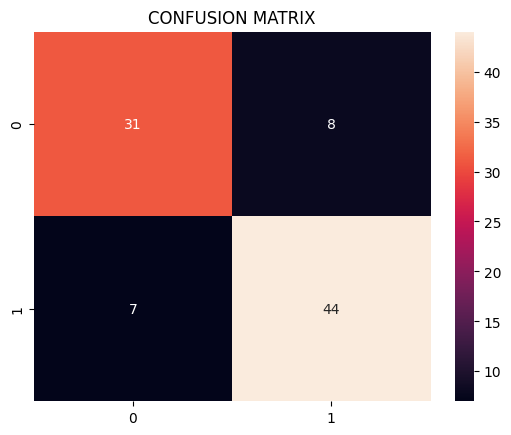


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.85      0.86      0.85        51

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [51]:
acc = accuracy_score(y_test, y_pred_log)*100
Accuracies['LogisticRegression'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("Logistic TRAIN score with ",format(lr.score(x_train, y_train)))
print("Logistic TEST score with ",format(lr.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_log)
print(co)
sns.heatmap(co,annot=True,)
plt.title('CONFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_log))

# Decision Tree

#### Hyper parameter tuning

In [52]:
dTree = DecisionTreeClassifier()

In [53]:
parameters_dTree = {
'criterion' : ["gini", "entropy"],
    'max_depth':[5,6,7],
    'max_leaf_nodes':[10,12,15],
    'min_samples_leaf':[5, 10,15],
    'random_state':[101,42,0]
}

In [54]:
search = GridSearchCV(dTree, parameters_dTree)

In [55]:
result = search.fit(x_train, y_train)

In [56]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7571428571428571
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'random_state': 42}


In [57]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_leaf_nodes = 15, min_samples_leaf = 5,random_state =42 )

In [58]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15,
                       min_samples_leaf=5, random_state=42)

In [59]:
y_pred_dTree = dTree.predict(x_test)

Accuracy :78.89%
Decision Tree TRAIN score with  0.861904761904762
Logistic TEST score with  0.7888888888888889

[[36  3]
 [16 35]]


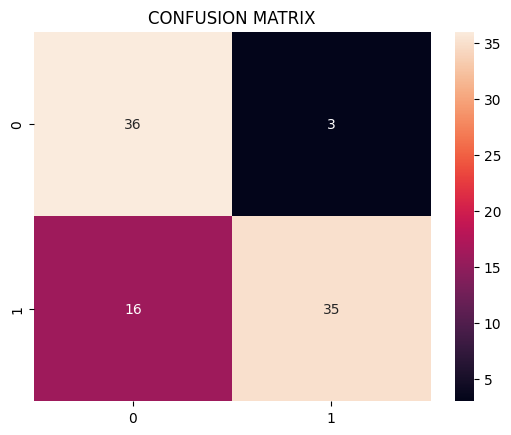


              precision    recall  f1-score   support

           0       0.69      0.92      0.79        39
           1       0.92      0.69      0.79        51

    accuracy                           0.79        90
   macro avg       0.81      0.80      0.79        90
weighted avg       0.82      0.79      0.79        90



In [60]:
acc = accuracy_score(y_test, y_pred_dTree)*100
Accuracies['Decision Tree'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("Decision Tree TRAIN score with ",format(dTree.score(x_train, y_train)))
print("Logistic TEST score with ",format(dTree.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_dTree)
print(co)
sns.heatmap(co,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_dTree))

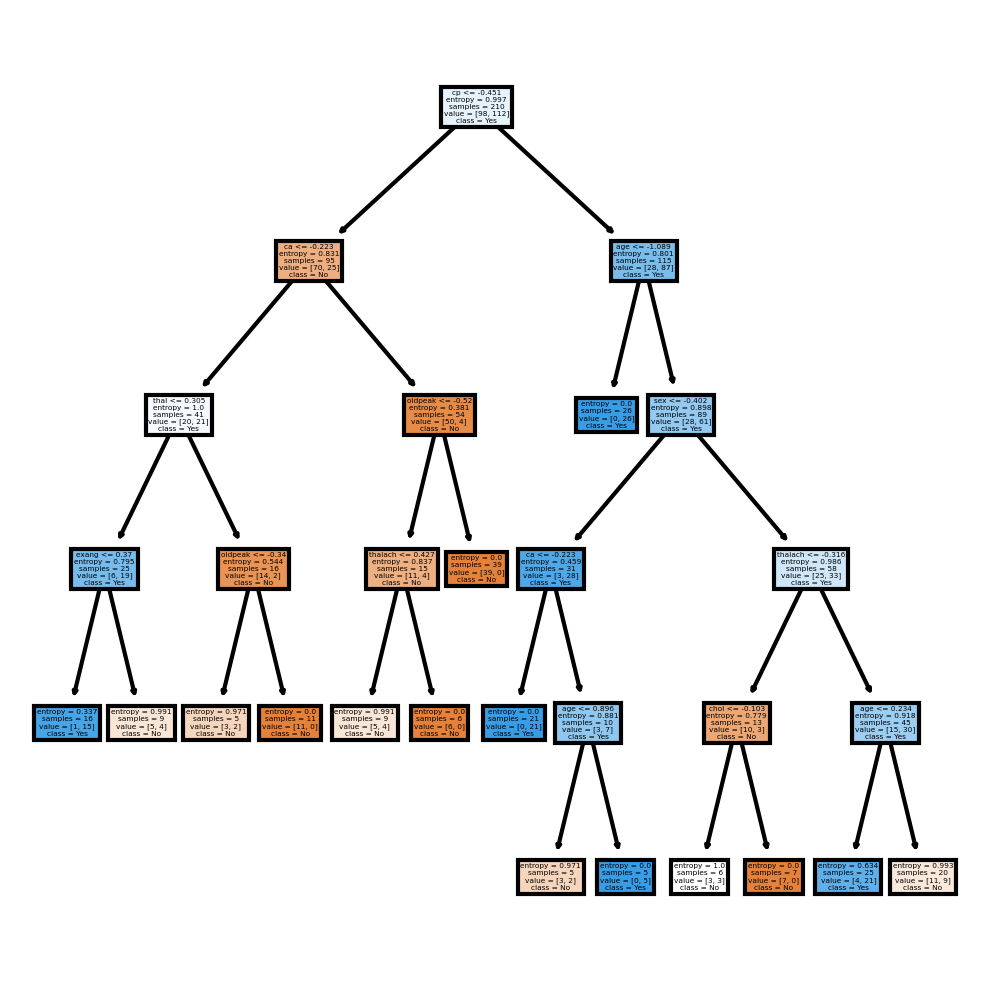

In [61]:
fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

# Support Vector Machines

#### hyper parameter tuning

In [62]:
parameters_svm = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [63]:
svm = SVC()

In [64]:
search = GridSearchCV(svm, parameters_svm)

In [65]:
result = search.fit(x_train, y_train)

In [66]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8380952380952381
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [67]:
svm = SVC(C = 100, gamma = 0.001, kernel = 'rbf' )

In [68]:
svm.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [69]:
y_pred_svm = svm.predict(x_test)

Accuracy :83.33%
Support Vector Machines Train score with  0.8380952380952381
Support Vector Machines TEST score with  0.8333333333333334

[[31  8]
 [ 7 44]]


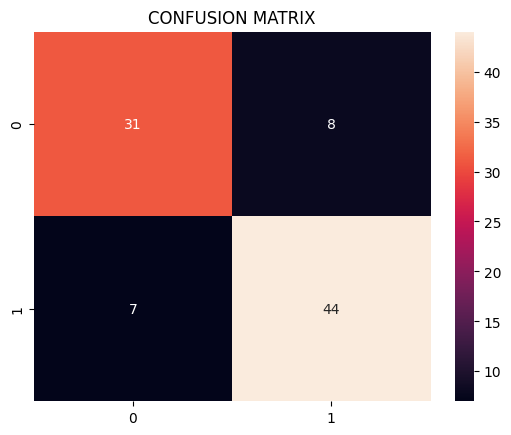


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.85      0.86      0.85        51

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [70]:
acc = accuracy_score(y_test, y_pred_svm)*100
Accuracies['Support Vector Machines'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("Support Vector Machines Train score with ",format(svm.score(x_train, y_train)))
print("Support Vector Machines TEST score with ",format(svm.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_svm)
print(co)
sns.heatmap(co,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_svm))

# Naive Bayes 

In [71]:
nb = GaussianNB()

In [72]:
nb.fit(x_train, y_train)

GaussianNB()

In [73]:
y_pred_nb = nb.predict(x_test)

Accuracy :85.56%
Naive Bayes Train score with  0.8380952380952381
Naive Bayes TEST score with  0.8555555555555555

[[35  4]
 [ 9 42]]


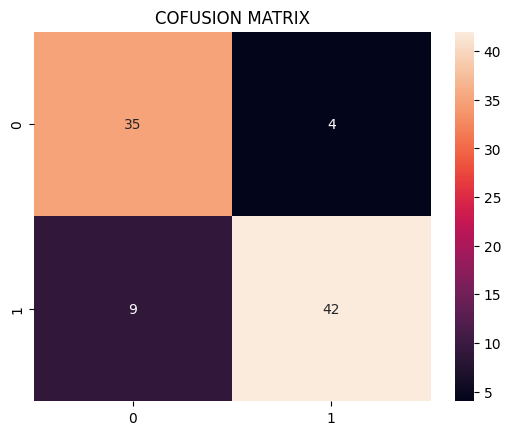


              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.91      0.82      0.87        51

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



In [74]:
acc = accuracy_score(y_test, y_pred_nb)*100
Accuracies['Naive Bayes'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("Naive Bayes Train score with ",format(nb.score(x_train, y_train)))
print("Naive Bayes TEST score with ",format(nb.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_nb)
print(co)
sns.heatmap(co,annot=True)
plt.title('COFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_nb))

# KNN 

In [75]:
knn = KNeighborsClassifier()

#### Hyper parameter tuning

In [76]:

parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [77]:
search = GridSearchCV(knn, parameters)

In [78]:
result = search.fit(x_train, y_train)

In [79]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8238095238095238
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}


In [80]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size= 10, n_neighbors = 5, weights = 'uniform'  )

In [81]:
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10)

In [82]:
joblib.dump(knn, 'knndisease.joblib')

['knndisease.joblib']

In [83]:
y_pred_knn = knn.predict(x_test)

Accuracy :86.67%
KNN Train score with  0.8761904761904762
KNN TEST score with  0.8666666666666667

[[35  4]
 [ 8 43]]


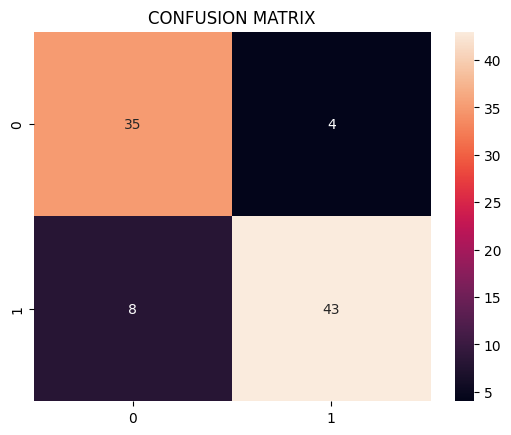


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.91      0.84      0.88        51

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



In [84]:
acc = accuracy_score(y_test, y_pred_knn)*100
Accuracies['KNN'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("KNN Train score with ",format(knn.score(x_train, y_train)))
print("KNN TEST score with ",format(knn.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_knn)
print(co)
sns.heatmap(co,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_knn))

# Random Forest

In [85]:
rf = RandomForestClassifier()

#### hyper parameter tuning

In [86]:
parameters_rf = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [10, 15, 20]
             }

In [87]:
search = GridSearchCV(rf, parameters_rf,error_score='raise')

In [88]:
result = search.fit(x_train, y_train)

In [89]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8476190476190476
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 10}


In [90]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features= 'sqrt', min_samples_leaf = 20, min_samples_split = 2, n_estimators = 9  )

In [91]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=9)

In [92]:
y_pred_rf = rf.predict(x_test)
rf.score(x_test, y_test)

0.7888888888888889

Accuracy :78.89%
Random Forest Train score with  0.8047619047619048
Random Forest TEST score with  0.7888888888888889

[[29 10]
 [ 9 42]]


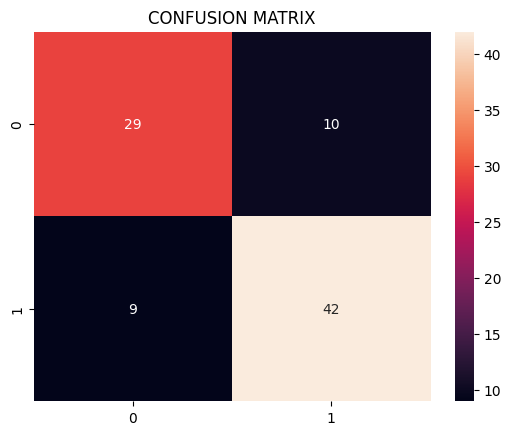


              precision    recall  f1-score   support

           0       0.76      0.74      0.75        39
           1       0.81      0.82      0.82        51

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



In [93]:
acc = accuracy_score(y_test, y_pred_rf)*100
Accuracies['Random Forest'] = acc
print('Accuracy :{:.2f}%'.format (acc))
print("Random Forest Train score with ",format(rf.score(x_train, y_train)))
print("Random Forest TEST score with ",format(rf.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred_rf)
print(co)
sns.heatmap(co,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()
print()
print(classification_report(y_test, y_pred_rf))

In [94]:
Accuracies

{'LogisticRegression': 83.33333333333334,
 'Decision Tree': 78.88888888888889,
 'Support Vector Machines': 83.33333333333334,
 'Naive Bayes': 85.55555555555556,
 'KNN': 86.66666666666667,
 'Random Forest': 78.88888888888889}

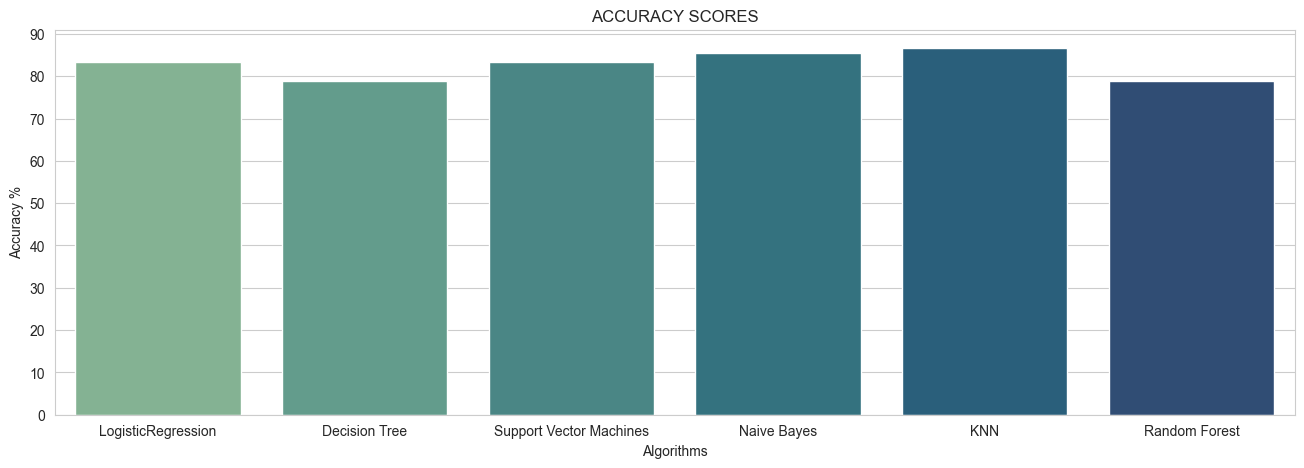

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title('ACCURACY SCORES')
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()),hue =list(Accuracies.keys()), legend = False,  palette='crest')
plt.show()

In [96]:
best_model = max(Accuracies.items(), key=lambda item: item[1])
print('Best_model :', best_model)

Best_model : ('KNN', 86.66666666666667)


### Prediction For A New Patient

In [97]:
# for the calculation of Z score for the data of New patient
mean= X.mean()
std= X.std()

In [98]:
## new patient Data
new_patient= {'age':69,'sex':1,'cp':3,'trestbps':145,'chol':233,'fbs':1,'restecg':0,'thalach':150,'exang':0,'oldpeak':2.3,'slope':0,'ca':0,'thal':1}

new_patient_series = pd.Series(new_patient)# converting in to a series

new_patient_scaled = ((new_patient_series- mean)/std) # applying Zscore

new_patient_scaled_array=np.array(new_patient_scaled).reshape(1, -1)# converting to an array

knn.predict(new_patient_scaled_array)


array([1], dtype=int64)

### Saving The Model

In [99]:
import pickle # using pickle library 
with open('model_pickle', 'wb') as pickle_file:

    pickle.dump(rf, pickle_file)

In [100]:
with open('model_pickle', 'rb') as pickle_file:
    rf_p = pickle.load(pickle_file)

In [101]:
rf_p.predict(x_test)
rf_p.score(x_test,y_test)

0.7888888888888889

or job lib

In [102]:
# import joblib as jb

In [103]:
# jb.dump(knn, 'knn')

In [104]:
# knj = jb.load('knn')

In [105]:
# knj.score(x_test,y_test)

### Simple GUI for Best Model

In [106]:
window= Tk()
window.title('Health care Prediction')# setting title for windoe
window.geometry('1250x500')# setting the size
# window.minsize(200,200)
# window.maxsize(300,700)
# window.iconbitmap(r"C:\Users\jishn\OneDrive\Pictures\Screenshots\Screenshot 2023-08-12 124457.png")
window.config(bg= 'gray') #setting BG

In [107]:
header= Label(window, text='Heart Disease Prediction', bg= 'gray',fg= 'black', font=('Cambria', 25,'bold') )
header.pack(pady=15)

frame= Frame(window, bg= 'gray')# creating a frame to perform grid action
frame.pack(pady= 50)

#### Adding widgets and labels

In [108]:
label1= Label(frame, text= 'age', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"), width= 15)
label1.grid(row= 0, column= 0,pady=10)
entry1= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry1.grid(row= 0, column= 1,pady= 10)
#############################################################################################################################

label2= Label(frame, text= 'sex', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label2.grid(row= 0, column= 2,pady=10)
entry2= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry2.grid(row= 0, column= 3, pady=10)
##############################################################################################################################

label3= Label(frame, text= 'cp', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label3.grid(row= 0, column= 4,pady=10)
entry3= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry3.grid(row= 0, column= 5, pady=10)
##############################################################################################################################

label4= Label(frame, text= 'trestbps', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label4.grid(row= 0, column= 6)
entry4= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry4.grid(row= 0, column= 7, pady=10)
##############################################################################################################################
label5= Label(frame, text= 'chol', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label5.grid(row= 1, column= 0)
entry5= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry5.grid(row= 1, column= 1,pady= 10)
#############################################################################################################################

label6= Label(frame, text= 'fbs', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label6.grid(row= 1, column= 2)
entry6= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry6.grid(row= 1, column= 3, pady=10)
##############################################################################################################################

label7= Label(frame, text= 'restecg', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label7.grid(row= 1, column= 4)
entry7= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry7.grid(row= 1, column= 5, pady=10)
##############################################################################################################################

label8= Label(frame, text= 'thalach', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label8.grid(row= 1, column= 6)
entry8= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry8.grid(row= 1, column= 7)
#########################################################################################
label9= Label(frame, text= 'exang', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label9.grid(row= 2, column= 0)
entry9= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry9.grid(row= 2, column= 1, pady=10)
##############################################################################################################################

label10= Label(frame, text= 'oldpeak', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label10.grid(row= 2, column= 2, pady=10)
entry10= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry10.grid(row= 2, column= 3, pady=10)
##############################################################################################################################

label11= Label(frame, text= 'slope', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label11.grid(row= 2, column= 4)
entry11= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry11.grid(row= 2, column= 5,pady=10)
#########################################################################################
label12= Label(frame, text= 'ca', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label12.grid(row= 2, column= 6)
entry12= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry12.grid(row= 2, column= 7, pady=10)
##############################################################################################################################

label13= Label(frame, text= 'thal', bg= 'lightblue', fg='black', font= ('Arial', 12, "bold"),width= 15)
label13.grid(row= 3, column= 0)
entry13= Entry(frame,  font=('Arial', 12), bg='black', fg='white', borderwidth= 3,width= 10)
entry13.grid(row= 3, column= 1, pady=10)
##############################################################################################################################



patient= Label(window, text='', bg= 'gray', fg='white', font=('Arial', 12, 'bold'))
patient.pack()




In [109]:

def predictor():  #function to perform the prediction
    
    
    model_knn= joblib.load('knndisease.joblib')
        
    age1 = int(entry1.get())
    sex1 = int(entry2.get())
    cp1= float(entry3.get())
    resting_blood_pressure= float(entry4.get())
    chol1= float(entry5.get())
    fbs1= float(entry6.get())
    rest_ecg= float(entry7.get())
    max_heartRate= float(entry8.get())
    exang1= float(entry9.get())
    old_peak= float(entry10.get())
    slope1= float(entry11.get())
    ca1= float(entry12.get())
    thalisemia= float(entry13.get())
    
    new_patient= {'age':age1,'sex':sex1,'cp':cp1,'trestbps':resting_blood_pressure,'chol':chol1,'fbs':fbs1,'restecg':rest_ecg,'thalach':max_heartRate,'exang':exang1,'oldpeak':old_peak,'slope':slope1,'ca':ca1,'thal':thalisemia}

    new_patient_series = pd.Series(new_patient)# converting in to a series

    new_patient_scaled = ((new_patient_series- mean)/std) # applying Zscore

    new_patient_scaled_array=np.array(new_patient_scaled).reshape(1, -1)# converting to an array


    prediction= model_knn.predict(new_patient_scaled_array)
    
    if prediction== 0:
        patient.config(text= 'Patient has no Heart Disease')
    else:
        patient.config(text= 'Patient has  Heart Disease')
        

In [110]:
button= Button(text='RESULT', bg= 'lightgreen', activebackground= 'blue',borderwidth= 3, font= ('Arial', 12,'italic','bold'), command=predictor )
button.pack(pady=5)## button for getting the prediction

In [111]:
window.mainloop()